In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import warnings

In [2]:
%matplotlib inline
#pd.options.plotting.backend
pd.plotting.register_matplotlib_converters()
#gpd.plotting.plot_linestring_collection
sns.set()
warnings.filterwarnings('ignore')

In [36]:
data=pd.read_csv(r'c:/users/hp/documents/dataset/world_cup_results.csv')
data.drop_duplicates(inplace=True) #Remove the duplicate entries

In [38]:
data.loc[data['Year']==2014].head(30)

,Year,Date,Time,Round,Stadium,City,HomeTeam,HomeGoals,AwayGoals,AwayTeam,Observation
772,2014,12-Jun-14,17:00,Group A,Arena de Sao Paulo,Sao Paulo,Brazil,3,1,Croatia,
773,2014,13-Jun-14,13:00,Group A,Estadio das Dunas,Natal,Mexico,1,0,Cameroon,
774,2014,13-Jun-14,16:00,Group B,Arena Fonte Nova,Salvador,Spain,1,5,Netherlands,
775,2014,13-Jun-14,18:00,Group B,Arena Pantanal,Cuiaba,Chile,3,1,Australia,
776,2014,14-Jun-14,13:00,Group C,Estadio Mineirao,Belo Horizonte,Colombia,3,0,Greece,
777,2014,14-Jun-14,16:00,Group D,Estadio Castelao,Fortaleza,Uruguay,1,3,Costa Rica,
778,2014,14-Jun-14,18:00,Group D,Arena Amazonia,Manaus,England,1,2,Italy,
779,2014,14-Jun-14,22:00,Group C,Arena Pernambuco,Recife,C�te d'Ivoire,2,1,Japan,
780,2014,15-Jun-14,13:00,Group E,Estadio Nacional,Brasilia,Switzerland,2,1,Ecuador,
781,2014,15-Jun-14,16:00,Group E,Estadio Beira-Rio,Porto Alegre,France,3,0,Honduras,


In [39]:
data_year=data.groupby(data['Year']).count()
data_year.head()

,Date,Time,Round,Stadium,City,HomeTeam,HomeGoals,AwayGoals,AwayTeam,Observation
Year,,,,,,,,,,
1930,18,18,18,18,18,18,18,18,18,18
1934,17,17,17,17,17,17,17,17,17,17
1938,18,18,18,18,18,18,18,18,18,18
1950,22,22,22,22,22,22,22,22,22,22
1954,26,26,26,26,26,26,26,26,26,26


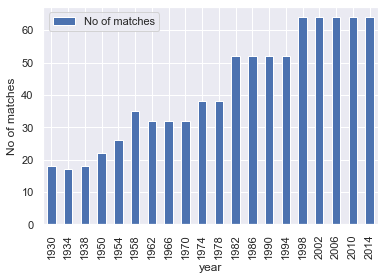

In [40]:
match_by_year=pd.DataFrame({'year':[x for x in data['Year'].unique()],'No of matches':[x for x in data_year['Date']]})
match_by_year.plot(x='year',y='No of matches', kind='bar')
plt.ylabel('No of matches')
plt.savefig('No of matches in a year.png')

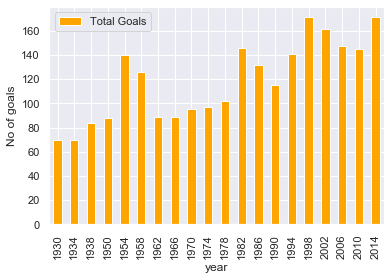

In [41]:
data_year=data.groupby(data['Year']).sum()
total_goal_per_year=pd.DataFrame({'year':[x for x in data['Year'].unique()],
                                  'Total Goals':[x+y for x,y in zip(data_year['HomeGoals'],data_year['AwayGoals'])]})
total_goal_per_year.plot(x='year',y='Total Goals',kind='bar',color='orange')
plt.ylabel('No of goals')
plt.savefig('No of goals in a year.png')

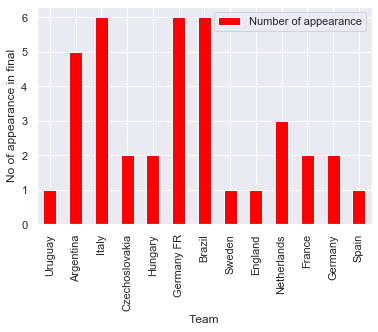

In [42]:
data_final=data.loc[data['Round']=='Final']
uniqueTeam=[]

for x,y in zip(data_final['HomeTeam'],data_final['AwayTeam']):
        uniqueTeam.append(x)
        uniqueTeam.append(y)
count=Counter(uniqueTeam)
Team_final=pd.DataFrame({'Team':[i for i in count], 'Number of appearance':[count[i] for i in count]})
Team_final.plot(x='Team',y='Number of appearance',kind='bar',color='red')
plt.ylabel('No of appearance in final')
plt.savefig('No of final appearance in a year.png')

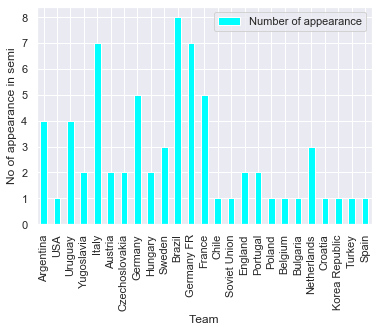

In [43]:
data_semi_final=data.loc[data['Round']=='Semi-finals']
uniqueTeam=[]

for x,y in zip(data_semi_final['HomeTeam'],data_semi_final['AwayTeam']):
        uniqueTeam.append(x)
        uniqueTeam.append(y)
count=Counter(uniqueTeam)
Team_semi_final=pd.DataFrame({'Team':[i for i in count], 'Number of appearance':[count[i] for i in count]})
Team_semi_final.plot(x='Team',y='Number of appearance',kind='bar',color='cyan')
plt.ylabel('No of appearance in semi')
plt.savefig('No of s-final appearance in a year.png')

In [56]:
total_goal_semi=sum((data_semi_final['HomeGoals']+data_semi_final['AwayGoals']))
Average_goal_semi=total_goal_semi/len(data_semi_final['HomeGoals'])
print ('total_goal_semi= {}, Average_goal_semi= {}'.format(total_goal_semi,Average_goal_semi))

total_goal_semi= 123, Average_goal_semi= 3.6176470588235294


In [45]:
data_quarter_final=data.loc[data['Round']=='Quarter-finals']
total_goal_quarter=sum((data_quarter_final['HomeGoals']+data_quarter_final['AwayGoals']))
Average_goal_quarter=total_goal_quarter/len(data_quarter_final['HomeGoals'])
print ('total_goal_quarter= {},Average_goal_quarter = {}'.format(total_goal_quarter,Average_goal_quarter))

total_goal_quarter= 175,Average_goal_quarter = 2.8225806451612905


In [46]:
data_Final=data.loc[data['Round']=='Final']
total_goal_Final=sum((data_Final['HomeGoals']+data_Final['AwayGoals']))
Average_goal_Final=total_goal_Final/len(data_Final['HomeGoals'])
print ('total_goal_Final = {} , Average_goal_Final = {}' .format(total_goal_Final,Average_goal_Final))

total_goal_Final = 68 , Average_goal_Final = 3.5789473684210527


In [47]:
unwanted=['Quarter-finals', 'Semi-Finals', 'Finals', 'Play-off for third place']
newdata=data[~(data['Round'].isin(['Quarter-finals', 'Semi-finals', 'Final', 
                                   'Play-off for third place','Match for third place']))]
total_matches_played_outside_quarter_finals=len(newdata['Date'])
print('total_matches_played_outside_quarter_finals = ',total_matches_played_outside_quarter_finals)

total_matches_played_outside_quarter_finals =  705


In [48]:
Original_data=data.copy()
data['Observation']=data['Observation'].str.split()
data.reset_index
for x in data.index:
    if len(data['Observation'].at[x])!=0:
        data['Observation'].at[x]=data['Observation'].at[x][0]

In [49]:
data


,Year,Date,Time,Round,Stadium,City,HomeTeam,HomeGoals,AwayGoals,AwayTeam,Observation
0,1930,13-Jul-30,15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,[]
1,1930,13-Jul-30,15:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,[]
2,1930,14-Jul-30,12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,[]
3,1930,14-Jul-30,14:50,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,[]
4,1930,15-Jul-30,16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,[]
...,...,...,...,...,...,...,...,...,...,...,...
831,2014,5-Jul-14,13:00,Quarter-finals,Estadio Nacional,Brasilia,Argentina,1,0,Belgium,[]
832,2014,29-Jun-14,13:00,Round of 16,Estadio Castelao,Fortaleza,Netherlands,2,1,Mexico,[]
833,2014,29-Jun-14,17:00,Round of 16,Arena Pernambuco,Recife,Costa Rica,1,1,Greece,Costa
834,2014,1-Jul-14,13:00,Round of 16,Arena de Sao Paulo,Sao Paulo,Argentina,1,0,Switzerland,Argentina


In [50]:
data['outcome']=np.where(data['HomeGoals']>data['AwayGoals'],'HomeTeam wins',np.where(data['HomeGoals']==data['AwayGoals'],'Draw','AwayTeam wins'))

In [51]:
data['winner']='a'
for i in data.index:
    if data['outcome'].at[i]=='HomeTeam wins':
        data['winner'].at[i]=data['HomeTeam'].at[i]
    elif data['outcome'].at[i]=='AwayTeam wins':
        data['winner'].at[i]=data['AwayTeam'].at[i]
    elif (data['outcome'].at[i]=='Draw') & (data['Round'].at[i] in ('Quarter-finals','Semi-finals',
                                                                    'Final','Play-off for third place','Round of 16')):
        data['winner'].at[i]=data['Observation'].at[i]
    else:
        data['winner'].at[i]='Draw'

In [52]:
data

,Year,Date,Time,Round,Stadium,City,HomeTeam,HomeGoals,AwayGoals,AwayTeam,Observation,outcome,winner
0,1930,13-Jul-30,15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,[],HomeTeam wins,France
1,1930,13-Jul-30,15:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,[],HomeTeam wins,USA
2,1930,14-Jul-30,12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,[],HomeTeam wins,Yugoslavia
3,1930,14-Jul-30,14:50,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,[],HomeTeam wins,Romania
4,1930,15-Jul-30,16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,[],HomeTeam wins,Argentina
...,...,...,...,...,...,...,...,...,...,...,...,...,...
831,2014,5-Jul-14,13:00,Quarter-finals,Estadio Nacional,Brasilia,Argentina,1,0,Belgium,[],HomeTeam wins,Argentina
832,2014,29-Jun-14,13:00,Round of 16,Estadio Castelao,Fortaleza,Netherlands,2,1,Mexico,[],HomeTeam wins,Netherlands
833,2014,29-Jun-14,17:00,Round of 16,Arena Pernambuco,Recife,Costa Rica,1,1,Greece,Costa,Draw,Costa
834,2014,1-Jul-14,13:00,Round of 16,Arena de Sao Paulo,Sao Paulo,Argentina,1,0,Switzerland,Argentina,HomeTeam wins,Argentina


In [55]:
Original_data['outcome']=data['outcome']
Original_data['winner']=data['winner']
Original_data['winner'].at[28]='Match replayed'

Original_data[['Year','Date','HomeTeam','HomeGoals','AwayGoals','AwayTeam','winner']]

,Year,Date,HomeTeam,HomeGoals,AwayGoals,AwayTeam,winner
0,1930,13-Jul-30,France,4,1,Mexico,France
1,1930,13-Jul-30,USA,3,0,Belgium,USA
2,1930,14-Jul-30,Yugoslavia,2,1,Brazil,Yugoslavia
3,1930,14-Jul-30,Romania,3,1,Peru,Romania
4,1930,15-Jul-30,Argentina,1,0,France,Argentina
...,...,...,...,...,...,...,...
831,2014,5-Jul-14,Argentina,1,0,Belgium,Argentina
832,2014,29-Jun-14,Netherlands,2,1,Mexico,Netherlands
833,2014,29-Jun-14,Costa Rica,1,1,Greece,Costa
834,2014,1-Jul-14,Argentina,1,0,Switzerland,Argentina


WINNER BY AWAY GOAL

In [54]:
data['Winner_away_goal']=np.where(data['HomeGoals']>data['AwayGoals'],data['HomeTeam'],data['AwayTeam'])
Original_data['Winner_away_goal']=data['Winner_away_goal']
Original_data

,Year,Date,Time,Round,Stadium,City,HomeTeam,HomeGoals,AwayGoals,AwayTeam,Observation,outcome,winner,Winner_away_goal
0,1930,13-Jul-30,15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,,HomeTeam wins,France,France
1,1930,13-Jul-30,15:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,,HomeTeam wins,USA,USA
2,1930,14-Jul-30,12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,,HomeTeam wins,Yugoslavia,Yugoslavia
3,1930,14-Jul-30,14:50,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,,HomeTeam wins,Romania,Romania
4,1930,15-Jul-30,16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,,HomeTeam wins,Argentina,Argentina
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831,2014,5-Jul-14,13:00,Quarter-finals,Estadio Nacional,Brasilia,Argentina,1,0,Belgium,,HomeTeam wins,Argentina,Argentina
832,2014,29-Jun-14,13:00,Round of 16,Estadio Castelao,Fortaleza,Netherlands,2,1,Mexico,,HomeTeam wins,Netherlands,Netherlands
833,2014,29-Jun-14,17:00,Round of 16,Arena Pernambuco,Recife,Costa Rica,1,1,Greece,Costa Rica win on penalties (5 - 3),Draw,Costa,Greece
834,2014,1-Jul-14,13:00,Round of 16,Arena de Sao Paulo,Sao Paulo,Argentina,1,0,Switzerland,Argentina win after extra time,HomeTeam wins,Argentina,Argentina
